In [19]:
import zipfile
import os

# extract zip file
local_zip = 'data/ml-1m.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [20]:
# print unzipped files
print(os.listdir('data/ml-1m/'))

['users.dat', 'movies.dat', 'README', 'ratings.dat']


In [1]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# All ratings are contained in the file "ratings.dat" and are in the following format:
# UserID::MovieID::Rating::Timestamp

# Load the "ratings.dat" file into dataframe.
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, 
                        names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

print(ratings.shape)

(1000209, 4)


In [3]:
# Display first five ratings
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# User information is in the file "users.dat" and is in the following format:
# UserID::Gender::Age::Occupation::Zip-code

# Load the "users.dat" file into dataframe.
users = pd.read_table('data/ml-1m/users.dat', sep='::', header=None,
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

print(users.shape)

(6040, 5)


In [5]:
# Display first five users
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# Movie information is in the file "movies.dat" and is in the following format:
# MovieID::Title::Genres

# Load the "movies.dat" file into dataframe.
movies = pd.read_table('data/ml-1m/movies.dat', sep='::', header=None,
                        names=['MovieID', 'Title', 'Genres'])

print(movies.shape)

(3883, 3)


In [7]:
# Display first five movies
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
print("Total Ratings : ", ratings.shape[0])
print("Total Movies  : ", len(movies['MovieID'].unique()))
print("Total Users   : ", len(users['UserID'].unique()))

Total Ratings :  1000209
Total Movies  :  3883
Total Users   :  6040


In [9]:
# Join movies and ratings table on 'MovieID'
movie_ratings = pd.merge(movies, ratings, on='MovieID', how='right')

In [10]:
# Display first five movie ratings
movie_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [11]:
# Join users and movie_ratings table on 'UserID'
data = pd.merge(users, movie_ratings, on='UserID', how='left')

In [12]:
# Display first five users users movie ratings
data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [13]:
# Save male and female users informations in separate dataframes.
male_data = data[data.Gender=='M']
female_data = data[data.Gender=='F']

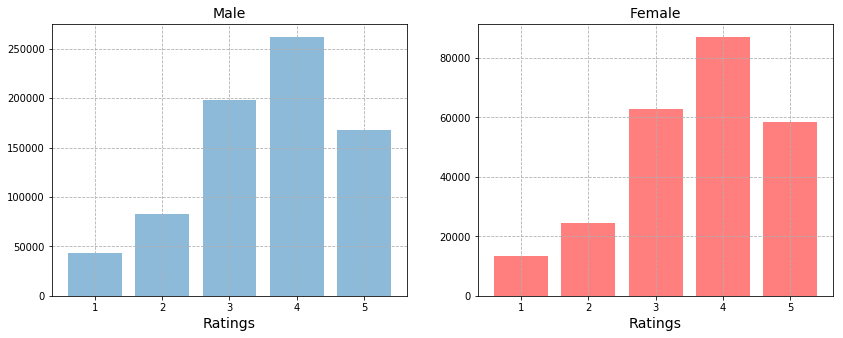

In [14]:
# Male Ratings count
male_ratings = male_data.groupby('Rating')['UserID'].count()
# Female Ratings count
female_ratings = female_data.groupby('Rating')['UserID'].count()

fig, ax = plt.subplots(1,2, figsize=(14,5))
fsize = 14

ax[0].bar(male_ratings.index, male_ratings.values, alpha=0.5)
ax[0].set_xlabel('Ratings', fontsize=fsize)
ax[0].set_title('Male', fontsize=fsize)
ax[0].grid(True, ls='--')

ax[1].bar(female_ratings.index, female_ratings.values, color='r', alpha=0.5)
ax[1].set_xlabel('Ratings', fontsize=fsize)
ax[1].set_title('Female', fontsize=fsize)
ax[1].grid(True, ls='--')

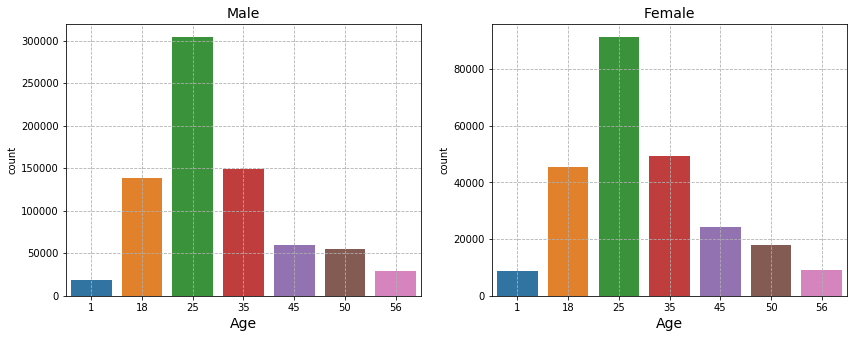

In [15]:
# Male & Female users age distribution
fig, ax = plt.subplots(1,2, figsize=(14,5))
fsize = 14

sns.countplot('Age', data=male_data, ax=ax[0])
ax[0].set_xlabel('Age', fontsize=fsize)
ax[0].set_title('Male', fontsize=fsize)
ax[0].grid(True, ls='--')

sns.countplot('Age', data=female_data, ax=ax[1])
ax[1].set_xlabel('Age', fontsize=fsize)
ax[1].set_title('Female', fontsize=fsize)
ax[1].grid(True, ls='--')

Text(0.5, 1.0, 'Female')

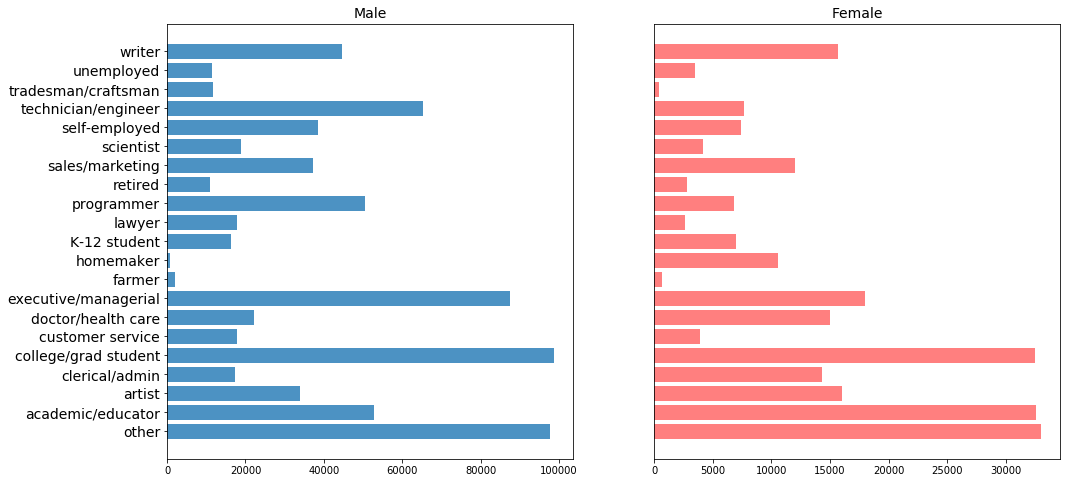

In [19]:
occupation = ["other", "academic/educator", "artist", "clerical/admin", "college/grad student", "customer service", 
              "doctor/health care", "executive/managerial", "farmer", "homemaker", "K-12 student", "lawyer", "programmer", 
              "retired", "sales/marketing", "scientist", "self-employed", "technician/engineer", "tradesman/craftsman", 
              "unemployed", "writer"]

# Male rating counts by occupation code.
male_df = male_data.groupby(['Occupation'])['Gender'].count()
# Female rating counts by occupation code.
female_df = female_data.groupby(['Occupation'])['Gender'].count()

fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].barh(male_df.index, male_df.values, alpha=0.8)
ax[0].set_yticks(np.arange(0, 21, 1))
ax[0].set_yticklabels(occupation, fontsize=14)
ax[0].set_title('Male', fontsize=14)

ax[1].barh(female_df.index, female_df.values, color='r', alpha=0.5)
ax[1].set_yticks([])
ax[1].set_title('Female', fontsize=14)

In [20]:
# Top 10 most rated movies by Male
df1 = pd.DataFrame(male_data.groupby('Title')['Rating'].count().sort_values(ascending=False).head(10))

df1

,Rating
Title,
American Beauty (1999),2482
Star Wars: Episode IV - A New Hope (1977),2344
Star Wars: Episode V - The Empire Strikes Back (1980),2342
Star Wars: Episode VI - Return of the Jedi (1983),2230
Terminator 2: Judgment Day (1991),2193
Jurassic Park (1993),2099
Saving Private Ryan (1998),2078
"Matrix, The (1999)",2076
Men in Black (1997),2000


In [21]:
# Top 10 most rated movies by Female
df2 = pd.DataFrame(female_data.groupby('Title')['Rating'].count().sort_values(ascending=False).head(10))

#df2.plot(kind='barh', figsize=(12,6), title='Top 10 most rated movies by Female')
df2

,Rating
Title,
American Beauty (1999),946
Shakespeare in Love (1998),798
"Silence of the Lambs, The (1991)",706
"Sixth Sense, The (1999)",664
Groundhog Day (1993),658
Fargo (1996),657
Star Wars: Episode VI - Return of the Jedi (1983),653
Star Wars: Episode V - The Empire Strikes Back (1980),648
Star Wars: Episode IV - A New Hope (1977),647


In [22]:
# Male average ratings by Genres.
df3 = pd.DataFrame(male_data.groupby(['Genres'])['Rating'].mean().sort_values(ascending=False))

# Display top 10 highly rated Genres by male.
df3.head(10)

,Rating
Genres,
Sci-Fi|War,4.464789
Animation|Comedy|Thriller,4.445110
Film-Noir|Mystery,4.381536
Adventure|War,4.376633
Animation,4.353107
Action|Adventure|Drama|Sci-Fi|War,4.344577
Crime|Film-Noir,4.316514
Film-Noir|Sci-Fi,4.312500
Drama|Film-Noir,4.235409


In [23]:
# Female average ratings by Genres.
df4 = pd.DataFrame(female_data.groupby(['Genres'])['Rating'].mean().sort_values(ascending=False))

# Display top 10 highly rated Genres by female.
df4.head(10)

,Rating
Genres,
Animation|Comedy|Thriller,4.550802
Animation,4.533333
Film-Noir|Romance|Thriller,4.448718
Sci-Fi|War,4.376623
Adventure|Children's|Drama|Musical,4.355030
Film-Noir,4.339806
Action|Adventure|Romance|War,4.324232
Film-Noir|Mystery,4.319444
Comedy|Mystery|Romance|Thriller,4.308901
